In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("./STUDY_1_BFASOPG_RAW.csv")

In [4]:

df = df.convert_objects(convert_numeric=True)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [10]:
df = df.drop("Unnamed: 0",axis=1)

In [11]:
df.head()

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,A06844383SJTPQU97CMSO:3F6KKYWMNB2T3GR7DLGSJEWF...,3F6KKYWMNB2T3GR7DLGSJEWF3HSDNF,A06844383SJTPQU97CMSO,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1,2014-10-23 19:14:20,2014-10-23 19:14:51,2014-10-23 19:21:12,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,A10IJLXWZZTN6L:3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,A10IJLXWZZTN6L,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-23 19:09:11,2014-10-23 19:10:40,2014-10-23 19:28:20,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,A1102MP1CZI32V:3NQL1CS15R999WV7B8PX6G0T780VYM,3NQL1CS15R999WV7B8PX6G0T780VYM,A1102MP1CZI32V,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1,2014-10-23 19:25:16,2014-10-23 19:25:33,2014-10-23 19:35:12,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,A1153ZIEQX0ZJ8:3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,A1153ZIEQX0ZJ8,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-23 19:06:16,2014-10-23 19:06:23,2014-10-23 19:12:06,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,A11ZAAI7X8HSM0:3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,A11ZAAI7X8HSM0,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-23 19:05:36,2014-10-23 19:08:05,2014-10-23 19:27:27,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [12]:
len(df)

376

In [13]:
#df.to_csv("STUDY_1_BFASOPG_RAW.csv")

In [14]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print row
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [15]:
df=df[df['status']==4]


In [16]:
len(df)

334

In [17]:
df = df.apply(takestring,axis=1)
df = df.convert_objects(convert_numeric=True)

uniqueid          A1MQ9M8OX7BI0X:3SBEHTYCWN44NQB7C1QERRAZZ64IYC
assignmentid                     3SBEHTYCWN44NQB7C1QERRAZZ64IYC
workerid                                         A1MQ9M8OX7BI0X
hitid                            3AA88CN98P4T7131M26OFNUTG1DYKP
ipaddress                                        127.13.130.129
browser                                                  chrome
platform                                                windows
language                                                UNKNOWN
cond                                                          0
counterbalance                                                0
codeversion                                                   1
beginhit                                    2014-10-23 19:11:06
beginexp                                    2014-10-23 19:12:20
endhit                                      2014-10-23 19:40:01
bonus                                                         0
status                                  

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [18]:
len(df)

334

In [19]:
df = df[df['BFAS-1+'].notnull()]


In [20]:
len(df)

333

In [21]:
print df.columns.tolist()[:-17][-26:]
print len(df.columns.tolist()[:-17][-26:])

[u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']
26


In [22]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
   # print ls_col
    r_ls_col = ls_col[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
    bfas_cols = ['workerid']
    opg_cols = ['workerid']
    bfas_cols.extend(r_ls_col[:-26])
    opg_cols.extend(r_ls_col[-26:])
    Neuroticism = ['BFAS-1+','BFAS-2+','BFAS-3+',
                   'BFAS-4+','BFAS-5+','BFAS-6+',
                   'BFAS-F7-','BFAS-8-','BFAS-9-',
                   'BFAS-10-','BFAS-11+','BFAS-12+',
                   'BFAS-13+','BFAS-14+','BFAS-15+',
                   'BFAS-16+','BFAS-17-','BFAS-18-',
                   'BFAS-19-','BFAS-20-']
    print bfas_cols[0:10]
    print '\n'
    print opg_cols
    print '\n'
    BfasDf = df[bfas_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bfas_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
             #print BffDf[label].head()
             #print '\n'
             #print len(BffDf[label])
             #a = ref.sub(BffDf[label])
             #print a.head()
            BfasDf[label] = 100- BfasDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BfasDf.loc[label] = df['workerid']

    print OpgDf['OPG_16+'].loc[1]
    print type(OpgDf['OPG_16+'].loc[1])

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = df['workerid']

    ##Now, change neuroticism to stability
    for label in Neuroticism:
        BfasDf[label] = 100-BfasDf[label].astype(float)

    #BffDf.sort(axis=1,inplace=True,ascending=True)
    #OpgDf.sort(axis=1,inplace=True,ascending=True)

    return BfasDf,OpgDf


In [24]:
bfas,opg = split_and_reverse(df)

['workerid', u'BFAS-1+', u'BFAS-10-', u'BFAS-100-', u'BFAS-101-', u'BFAS-11+', u'BFAS-12+', u'BFAS-13+', u'BFAS-14+', u'BFAS-15+']


['workerid', u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']


59.91

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/


<type 'numpy.float64'>


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
print len(bfas)
print len(opg)

334
333


In [26]:
bfas = bfas.drop('workerid')

In [ ]:
#working towards: OPG -- Personality item correlation

In [27]:
correct_order_opg = [#'workerid',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
]

In [28]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'OPG_10+',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [29]:
ssopg = opg[subset]

In [30]:
ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
ssopg.head()

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,OPG_10+,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-,opg
0,94.033,90.03,94.154,89.81,65.09,90.14,90.03,90.48,89.92,90.48,89.81,93.791,17.48,90.26,89.92,98.88,10.41,89.70,90.65,81.845684
1,93.978,89.87,94.462,100.00,89.76,69.38,76.17,90.20,89.87,33.96,35.52,94.957,80.18,99.89,90.31,99.78,89.64,9.02,69.82,78.777211
2,71.802,67.59,70.031,64.25,62.81,66.26,62.58,62.69,55.35,32.85,42.43,35.425,100.00,38.31,68.26,100.00,26.50,29.84,64.70,59.035684
3,100.000,50.00,99.797,95.04,99.83,79.68,32.52,70.10,49.89,38.70,61.30,55.324,100.00,49.94,95.38,100.00,50.00,38.70,50.00,69.273737
4,93.538,92.37,93.538,91.37,90.14,20.15,90.21,88.15,90.32,12.08,74.09,93.670,19.96,37.69,70.77,17.92,8.35,75.89,89.29,65.762947


In [32]:
bfas['opg'] = ssopg['opg']

In [33]:
bfas.head()

,workerid,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,opg
0,A06844383SJTPQU97CMSO,8.85,10.41,86.02,9.97,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,45.04,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,89.25,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,70.55,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,9.47,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,30.68,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,90.03,64.64,90.70,89.37,88.25,89.70,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,9.08,90.37,90.14,65.87,90.26,91.04,81.845684
1,A10IJLXWZZTN6L,34.97,39.76,65.14,0.00,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,36.53,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,39.31,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,9.80,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,59.80,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,49.55,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,67.59,0.00,89.76,90.09,49.33,74.28,49.55,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,0.00,100.00,10.13,100.00,89.64,59.35,78.777211
2,A1102MP1CZI32V,58.80,40.65,67.82,60.24,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,40.87,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,32.63,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,31.40,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,28.40,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,37.81,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,62.58,34.52,67.37,60.58,25.50,59.02,30.96,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,41.20,39.98,60.36,49.78,53.67,67.48,59.035684
3,A1153ZIEQX0ZJ8,50.00,50.00,87.03,62.42,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,36.36,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,50.00,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,50.00,76.22,50.00,30.46,79.57,63.31,50.00,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,37.25,50.00,75.56,50.00,50.11,59.86,69.273737
4,A11ZAAI7X8HSM0,50.00,50.00,66.43,22.22,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,51.73,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,47.94,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,19.65,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,50.00,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,90.70,50.00,91.70,79.57,90.59,90.92,49.16,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,

In [34]:

correct_order_bfas = [
#'age','engagement',
 'BFAS-1+',
 'BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+',
 'BFAS-22+',
 'BFAS-23+',
 'BFAS-24+',
 'BFAS-25+',
 'BFAS-26-',
 'BFAS-27-',
 'BFAS-28-',
 'BFAS-29-',
 'BFAS-30-',
 'BFAS-31+',
 'BFAS-32+',
 'BFAS-33+',
 'BFAS-34+',
 'BFAS-35-',
 'BFAS-36-',
 'BFAS-37-',
 'BFAS-38-',
 'BFAS-39-',
 'BFAS-40-',
 'BFAS-41+',
 'BFAS-42+',
 'BFAS-43+',
 'BFAS-44+',
 'BFAS-45-',
 'BFAS-46-',
 'BFAS-47-',
 'BFAS-48-',
 'BFAS-49-',
 'BFAS-50-',
 'BFAS-51+',
 'BFAS-52+',
 'BFAS-53+',
 'BFAS-54+',
 'BFAS-55+',
 'BFAS-56+',
 'BFAS-57-',
 'BFAS-58-',
 'BFAS-59-',
 'BFAS-60-',
 'BFAS-61+',
 'BFAS-62+',
 'BFAS-63+',
 'BFAS-64+',
 'BFAS-65+',
 'BFAS-66-',
 'BFAS-67-',
 'BFAS-68-',
 'BFAS-69-',
 'BFAS-70-',
 'BFAS-71+',
 'BFAS-72+',
 'BFAS-73+',
 'BFAS-74+',
 'BFAS-75+',
 'BFAS-76+',
 'BFAS-77-',
 'BFAS-78-',
 'BFAS-79-',
 'BFAS-80-',
 'BFAS-81+',
 'BFAS-82+',
 'BFAS-F83+',
 'BFAS-F84+',
 'BFAS-F85+',
 'BFAS-F86+',
 'BFAS-F87-',
 'BFAS-88-',
 'BFAS-89-',
 'BFAS-90+',
 'BFAS-90-',#labeling was off by 1 here
 'BFAS-91+',
 'BFAS-92+',
 'BFAS-95+',
 'BFAS-96+',
 'BFAS-97+',
 'BFAS-98-',
 'BFAS-99-',
 'BFAS-100-',
 'BFAS-101-']

In [35]:
bfas = bfas[correct_order_bfas]

In [37]:
bfas['opg'] = ssopg['opg']

In [39]:
bfas_corr = bfas.corr()

In [46]:
bfascorr = bfas_corr['opg'].values

In [44]:
bfas_omega = pd.read_csv("./BFAS_I_OMEGA_5.csv")

In [47]:
bfasg = bfas_omega['g'].values

In [48]:
ssp.pearsonr(bfasg,bfascorr[:-1])

(0.73072259336381773, 6.1758284188663899e-18)

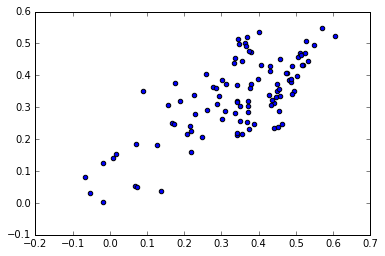

In [49]:
plt.scatter(bfasg,bfascorr[:-1])

#Now, As written
1. reverse all the stuff
2. rextract a GFP
3. eat cake
4. Profit

In [50]:
bfas_cols = correct_order_bfas

In [51]:
#### AS Factor Analyzed:


In [52]:
neuro_lbl = ['BFAS.5.',
 'BFAS.2.',
 'BFAS.1.',
 'BFAS.6.',
 'BFAS.4.',
 'BFAS.3.',
 'BFAS.15.',
 'BFAS.10.',
 'BFAS.13.',
 'BFAS.F7.',
 'BFAS.11.',
 'BFAS.14.',
 'BFAS.12.',
 'BFAS.17.',
 'BFAS.9.',
 'BFAS.16.',
 'BFAS.8.',
 'BFAS.19.',
 'BFAS.50.',
 'BFAS.20.',
 'BFAS.18.',
 'BFAS.47.',
 'BFAS.49.']


neurols = [5,2,1,6,4,3,15,10,13,7,11,14,12,17,9,16,8,19,50,20,18,47,49] 

In [53]:
print len(neuro_lbl)
print len(neurols)

23
23


In [54]:
agree_lbl =['BFAS.26.',
 'BFAS.23.',
 'BFAS.28.',
 'BFAS.27.',
 'BFAS.22.',
 'BFAS.21.',
 'BFAS.24.',
 'BFAS.25.',
 'BFAS.29.',
 'BFAS.30.',
 'BFAS.37.',
 'BFAS.40.',
 'BFAS.63.',
 'BFAS.91.',
 'BFAS.62.',
 'BFAS.35.',
 'BFAS.68.',
 'BFAS.67.',
 'BFAS.101.',
 'BFAS.90.',
 'BFAS.96.',
 'BFAS.98.',
 'BFAS.69.']



agree_ls = [26,23,28,27,22,21,24,25,29,30,37,40,63,91,62,35,68,67,100,90,95,97,69] 
#96,98 and 101 are mislabled; their index is adjusted by -1

In [55]:
print len(agree_lbl)
print len(agree_ls)

23
23


In [56]:
extra_lbl = ['BFAS.73.',
 'BFAS.75.',
 'BFAS.71.',
 'BFAS.74.',
 'BFAS.72.',
 'BFAS.77.',
 'BFAS.78.',
 'BFAS.76.',
 'BFAS.79.',
 'BFAS.61.',
 'BFAS.80.',
 'BFAS.64.',
 'BFAS.F85.',
 'BFAS.70.',
 'BFAS.65.',
 'BFAS.44.',
 'BFAS.38.',
 'BFAS.32.',
 'BFAS.34.',
 'BFAS.36.',
 'BFAS.33.',
 'BFAS.39.']



extra_ls = [73,75,71,74,72,77,78,76,79,61,80,64,85,70,65,44,38,32,34,36,33,39]

In [57]:
print len(extra_lbl)
print len(extra_ls)

22
22


In [58]:
conci_lbl = ['BFAS.51.',
 'BFAS.52.',
 'BFAS.56.',
 'BFAS.53.',
 'BFAS.54.',
 'BFAS.31.',
 'BFAS.55.',
 'BFAS.57.',
 'BFAS.42.',
 'BFAS.58.',
 'BFAS.41.',
 'BFAS.59.',
 'BFAS.60.',
 'BFAS.45.',
 'BFAS.46.',
 'BFAS.F86.',
 'BFAS.43.',
 'BFAS.48.',
 'BFAS.100.']


conci_ls = [51,52,56,53,54,31,55,57,42,58,41,59,60,45,46,86,43,48,99]

In [59]:
print len(conci_lbl)
print len(conci_ls)

19
19


In [60]:
opn_lbl = ['BFAS.F87.',
 'BFAS.F83.',
 'BFAS.88.',
 'BFAS.81.',
 'BFAS.82.',
 'BFAS.97.',
 'BFAS.89.',
 'BFAS.F84.',
 'BFAS.92.',
 'BFAS.90..1',
 'BFAS.99.',
 'BFAS.95.',
 'BFAS.66.']
opn_ls = [87,83,88,81,82,96,89,84,93,91,98,94,66]

In [61]:
print len(opn_lbl)
print len(opn_ls)

13
13


In [62]:
bfasfa = bfas.copy(True)


In [64]:
#columns to reverse so that they point towards their named factor
#Raw Items were already reversed
#All Neuroticism items were then reversed again
rv_cols = [38,32,34,36,33,39,99,66]


In [65]:
colz = bfasfa.columns.values.tolist()

In [66]:
reverse = [correct_order_bfas[x-1] for x in rv_cols]

In [67]:
for l in reverse:
    bfasfa[l] = 100 - bfasfa[l]

In [68]:
bfas.head()


,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,opg
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97,81.845684
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00,78.777211
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24,59.035684
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42,69.273737
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22,65.762947


In [69]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,opg
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,29.68,39.59,33.35,89.81,30.46,69.99,60.19,89.14,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,9.86,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,13.98,9.97,81.845684
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,0.00,20.60,9.80,99.55,0.00,100.00,0.00,0.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,93.54,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,34.86,0.00,78.777211
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,24.39,34.30,33.52,83.41,65.59,77.62,29.51,32.74,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,28.17,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,32.18,60.24,59.035684
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,18.43,32.91,28.95,77.34,22.66,50.00,6.74,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,32.57,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,12.97,62.42,69.273737
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,7.74,50.00,42.48,91.37,31.01,26.45,90.70,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,33.57,22.22,65.762947


In [91]:
bfasfa = bfasfa.drop(['opg'],axis=1)

In [92]:
bfasfa.to_csv("BFAS_STUDY_I_as_FA.csv",index=False)

In [93]:
bfasfa_omega = pd.read_csv("./BFAS_I_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [94]:
bfasfa_omega.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.476637,0.632021,0.124133,-0.132954,0.059930,-0.048443,0.659270,0.340730,0.344598
1,BFAS.2.,0.525610,0.679498,-0.010949,-0.027628,0.086537,-0.028094,0.739651,0.260349,0.373508
2,BFAS.3.,0.482756,0.564249,0.008627,-0.039765,0.036342,0.089735,0.557165,0.442835,0.418284
3,BFAS.4.,0.503473,0.587598,0.020781,0.000046,-0.047790,0.082465,0.609514,0.390486,0.415880
4,BFAS.5.,0.490529,0.693857,0.085786,-0.122198,0.028801,-0.078177,0.746543,0.253457,0.322311


In [95]:
fa_g = bfasfa_omega['g'].values

In [98]:
bfasfa['opg'] = ssopg['opg']

In [99]:
bc = bfasfa.corr()

In [100]:
ssp.pearsonr(bc['opg'].values[0:-1],fa_g)

(0.85213561153215889, 2.5844587136250757e-29)

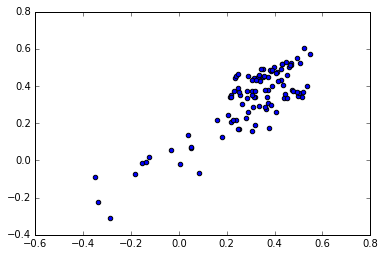

In [101]:
plt.scatter(bc['opg'].values[0:-1],fa_g)